#### sklearn.cluster.MeanShift
* class sklearn.cluster.MeanShift(*, bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)

In [33]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.6, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

##### sklearn.cluster.estimate_bandwidth
* sklearn.cluster.estimate_bandwidth(X, *, quantile=0.3, n_samples=None, random_state=0, n_jobs=None)

In [40]:
from sklearn.cluster import estimate_bandwidth ,MeanShift 

best_bandwidth = estimate_bandwidth(X, quantile=0.3)
best_bandwidth

2.8938086829917267

In [44]:
meanshift = MeanShift(bandwidth=1)
meanshift.fit(X)
labels = meanshift.predict(X)

In [45]:
meanshift.cluster_centers_

array([[ 0.77215134,  1.9048219 ],
       [ 7.85177332, -1.2559863 ],
       [ 4.38751852,  0.85528042],
       [ 2.87179091, -1.62748313]])

In [46]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt 

def plot_datas(X , rseed=0, ax=None , c=y_true ):
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=c, s=40, cmap='viridis', zorder=2)
    

def plot_meanshift(meanshift, X,  rseed=0, ax=None):
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = meanshift.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

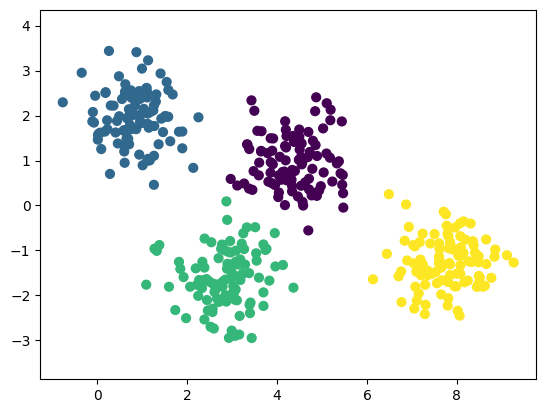

In [47]:
plot_datas(X)

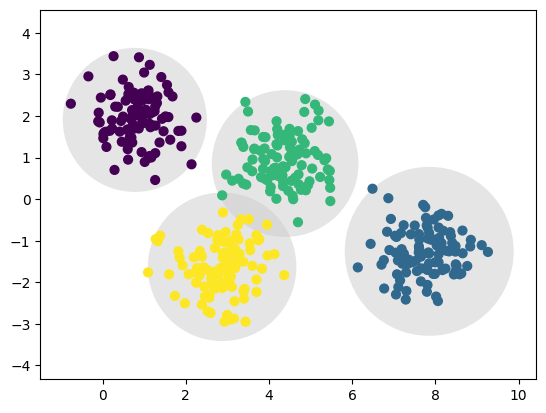

In [48]:
plot_meanshift(meanshift , X)

In [49]:
import numpy as np
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

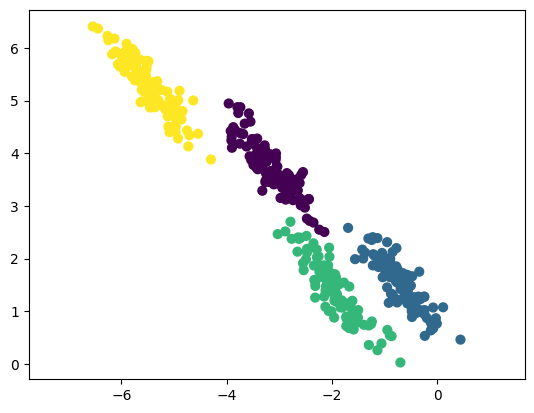

In [50]:
plot_datas(X_stretched)

In [55]:
meanshift = MeanShift(bandwidth=0.8)
meanshift.fit(X_stretched)
labels = meanshift.predict(X_stretched)

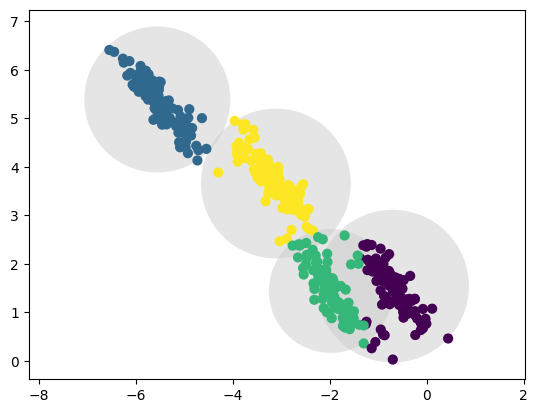

In [56]:
plot_meanshift(meanshift , X_stretched)

##### 실루엣평가

In [59]:
from sklearn.metrics import silhouette_samples , silhouette_score

result = silhouette_samples(X_stretched ,labels )
score = silhouette_score(X_stretched ,labels )

In [66]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

def visualize_silhouette(cluster_lists, X_features) : 
    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows = 1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists) : 
        meanshift = MeanShift(bandwidth=2.7)
        cluster_labels = meanshift.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n'
                           'Silhouette Score : ' + str(round(sil_avg, 3)))
        axs[ind].set_xlabel('The silhouette coefficient values')
        axs[ind].set_ylabel('Cluster label')
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster) : 
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor = color, edgecolor = color, alpha = 0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color='red', linestyle = '--')

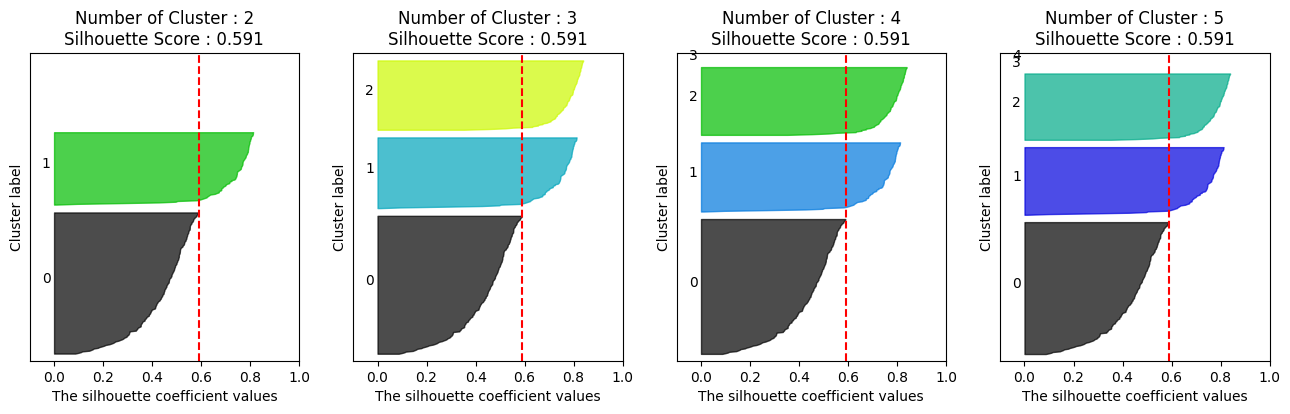

In [67]:
visualize_silhouette([2,3,4,5], X)

In [69]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
irisDF = pd.DataFrame(iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])


In [70]:
meanshift = MeanShift(bandwidth=0.8)
meanshift.fit(iris.data)
labels = meanshift.predict(iris.data)

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels = kmeans.fit_predict(iris.data)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [71]:
meanshift.cluster_centers_

array([[6.07333333, 2.84444444, 4.59333333, 1.49555556],
       [4.97272727, 3.40227273, 1.475     , 0.24545455],
       [6.33235294, 2.95294118, 5.23529412, 1.95      ],
       [7.8       , 3.8       , 6.55      , 2.1       ]])

In [72]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 2, 0, 3, 2, 2, 3, 0, 2, 2, 2, 3, 3,
       2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [73]:
irisDF['label'] = labels

In [77]:
irisDF['cluster_labels'] = cluster_labels

In [78]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,label,cluster_labels
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

X_train , X_test , y_train , y_test = train_test_split(iris.data , labels , test_size=0.2 , random_state=42)

rf_clf = RandomForestClassifier(max_depth=5 , random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test ,pred )

1.0

In [79]:
X_train , X_test , y_train , y_test = train_test_split(iris.data , cluster_labels , test_size=0.2 , random_state=42)

rf_clf = RandomForestClassifier(max_depth=5 , random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test ,pred )

0.9666666666666667